<a href="https://colab.research.google.com/github/mens0n/Jaehoon_Airline_Customer_Satisfaction_ML_Analysis.ipynb/blob/main/Jaehoon_Airline_Customer_Satisfaction_ML_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import files
uploaded_train = files.upload()

Saving train.csv to train (1).csv


In [70]:
from google.colab import files
uploaded_train = files.upload()

Saving test.csv to test.csv


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib import font_manager, rc

# EDA

In [71]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
df_train.T

0                1     \
id                                                 1                2   
Gender                                        Female           Female   
Customer Type                      disloyal Customer   Loyal Customer   
Age                                               22               37   
Type of Travel                       Business travel  Business travel   
Class                                            Eco         Business   
Flight Distance                                 1599             2810   
Seat comfort                                       3                2   
Departure/Arrival time convenient                  0                4   
Food and drink                                     3                4   
Gate location                                      3                4   
Inflight wifi service                              4                1   
Inflight entertainment                             3                4   
Online support                                     4                3   
Ease of Online booking                             4                5   
On-board service                                   5                5   
Leg room service                                   4                4   
Baggage handling                                   4                2   
Checkin service                                    4                1   
Cleanliness                                        5                5   
Online boarding                                    4                2   
Departure Delay in Minutes                         0               18   
Arrival Delay in Minutes                         0.0             18.0   
target                                             0                0   

                                              2                  3     \
id                                               3                  4   
Gender                                        Male             Female   
Customer Type                       Loyal Customer  disloyal Customer   
Age                                             46                 24   
Type of Travel                     Business travel    Business travel   
Class                                     Business                Eco   
Flight Distance                               2622               2348   
Seat comfort                                     1                  3   
Departure/Arrival time convenient                1                  3   
Food and drink                                   1                  3   
Gate location                                    1                  3   
Inflight wifi service                            4                  3   
Inflight entertainment                           5                  3   
Online support                                   5                  3   
Ease of Online booking                           4                  3   
On-board service                                 4                  2   
Leg room service                                 4                  4   
Baggage handling                                 4                  5   
Checkin service                                  5                  3   
Cleanliness                                      4                  4   
Online boarding                                  3                  3   
Departure Delay in Minutes                       0                 10   
Arrival Delay in Minutes                       0.0                2.0   
target                                           1                  0   

                                              4                5     \
id                                               5                6   
Gender                                      Female           Female   
Customer Type                       Loyal Customer   Loyal Customer   
Age                                             58               42   
Type of Travel                     Busine

In [72]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 3000 non-null   int64  
 1   Gender                             3000 non-null   object 
 2   Customer Type                      3000 non-null   object 
 3   Age                                3000 non-null   int64  
 4   Type of Travel                     3000 non-null   object 
 5   Class                              3000 non-null   object 
 6   Flight Distance                    3000 non-null   int64  
 7   Seat comfort                       3000 non-null   int64  
 8   Departure/Arrival time convenient  3000 non-null   int64  
 9   Food and drink                     3000 non-null   int64  
 10  Gate location                      3000 non-null   int64  
 11  Inflight wifi service              3000 non-null   int64

In [73]:
df_train.describe()

id          Age  Flight Distance  Seat comfort  \
count  3000.000000  3000.000000      3000.000000   3000.000000   
mean   1500.500000    39.203000      1983.079333      2.863333   
std     866.169729    15.108802      1028.109117      1.394981   
min       1.000000     7.000000        52.000000      0.000000   
25%     750.750000    27.000000      1348.250000      2.000000   
50%    1500.500000    39.000000      1937.000000      3.000000   
75%    2250.250000    51.000000      2547.250000      4.000000   
max    3000.000000    80.000000      6882.000000      5.000000   

       Departure/Arrival time convenient  Food and drink  Gate location  \
count                        3000.000000     3000.000000    3000.000000   
mean                            3.009667        2.874333       3.016667   
std                             1.519543        1.431511       1.294713   
min                             0.000000        0.000000       1.000000   
25%                             2.000000        2.000000       2.000000   
50%                             3.000000        3.000000       3.000000   
75%                             4.000000        4.000000       4.000000   
max                             5.000000        5.000000       5.000000   

       Inflight wifi service  Inflight entertainment  Online support  \
count            3000.000000             3000.000000      3000.00000   
mean                3.259667                3.352333         3.50500   
std                 1.322683                1.352826         1.31068   
min                 0.000000                0.000000         1.00000   
25%                 2.000000                2.000000         3.00000   
50%                 3.000000                4.000000         4.00000   
75%                 4.000000                4.000000         5.00000   
max                 5.000000                5.000000         5.00000   

       Ease of Online booking  On-board service  Leg room service  \
count             3000.000000       3000.000000       3000.000000   
mean                 3.488000          3.497000          3.485000   
std                  1.302211          1.283436          1.294218   
min                  0.000000          1.000000          0.000000   
25%                  2.000000          3.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  5.000000          5.000000          5.000000   
max                  5.000000          5.000000          5.000000   

       Baggage handling  Checkin service  Cleanliness  Online boarding  \
count       3000.000000      3000.000000  3000.000000      3000.000000   
mean           3.728667         3.370000     3.728667         3.356333   
std            1.154190         1.258158     1.161678         1.294057   
min            1.000000         1.000000     1.000000         0.000000   
25%            3.000000         3.000000     3.000000         2.000000   
50%            4.000000         3.000000     4.000000         4.000000   
75%            5.000000         4.000000     5.000000         4.000000   
max            5.000000         5.000000     5.000000         5.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes       target  
count                 3000.000000               3000.000000  3000.000000  
mean                    15.634333                 15.922000     0.556000  
std                     45.083228                 45.203411     0.496937  
min                      0.000000                  0.000000     0.000000  
25%                      0.000000                  0.000000     0.000000  
50%                      0.000000                  0.000000     1.000000  
75%                     12.000000                 13.000000     1.000000  
max                   1128.000000               1115.000000     1.000000

In [74]:
df_train.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

In [75]:
# id 는 제외하고 분석합니다.
df_train = df_train.drop('id', axis=1)
pd.set_option('display.max_columns', None) # 컬럼 수가 많으므로 요약되어 표시되지 않게 합니다.

# Visualization

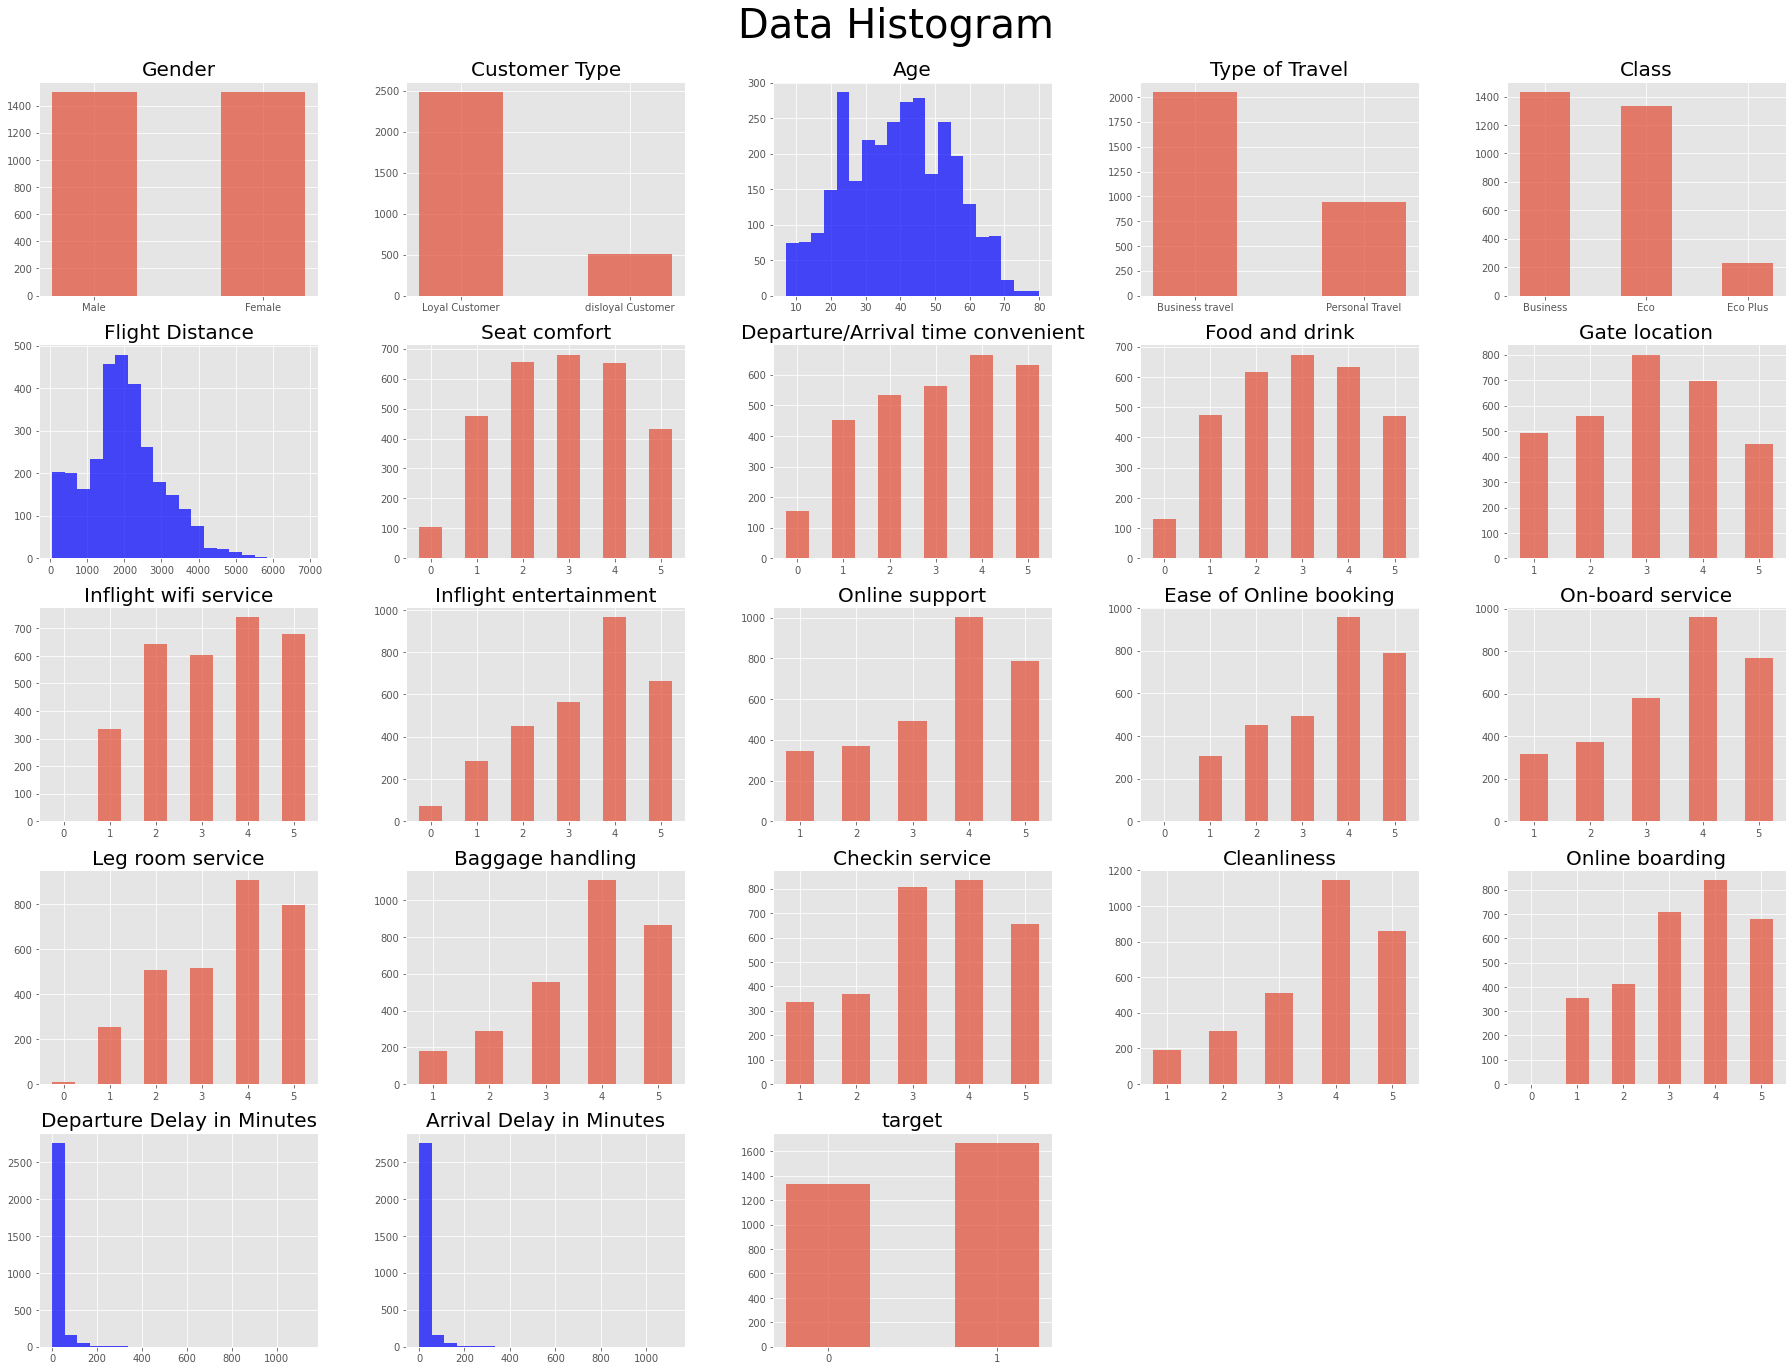

In [76]:
plt.style.use("ggplot")

# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(25,20))
plt.suptitle("Data Histogram", fontsize=40)

# id는 제외하고 시각화합니다.
cols = df_train.columns
for i in range(len(cols)):
    plt.subplot(5,5,i+1)
    plt.title(cols[i], fontsize=20)
    if len(df_train[cols[i]].unique()) > 20:
        plt.hist(df_train[cols[i]], bins=20, color='b', alpha=0.7)
    else:
        temp = df_train[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- sex은 비율은 비슷합니다
- age는 정규 분포 형태를 이루는 것으로 보입니다
- age를 제외한 연속형 변수들이 왼쪽으로 치우쳐져 있다는 것이 눈에 띕니다. (한쪽으로 치우쳐져 있으면 학습과정에 큰 영향을 끼칠 것이 우려되 scaling이 필요한 것으로 보입니다.)
- target은 약간의 차이가 있지만 심각한 imbalance는 아닌 듯 보입니다

In [77]:
numeric_feature = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
ordinal_feature = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 
           'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 
           'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']
categorical_feature = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [78]:
# log변환을 이용하여 치우쳐진 정도(skewness)를 줄이도록 합니다
for xstr in numeric_feature:
    print(xstr, "Scew :", df_train[xstr].skew())

Age Scew : 0.0010456925943488839
Flight Distance Scew : 0.4509930169224059
Departure Delay in Minutes Scew : 9.190139679910239
Arrival Delay in Minutes Scew : 8.887761727831762


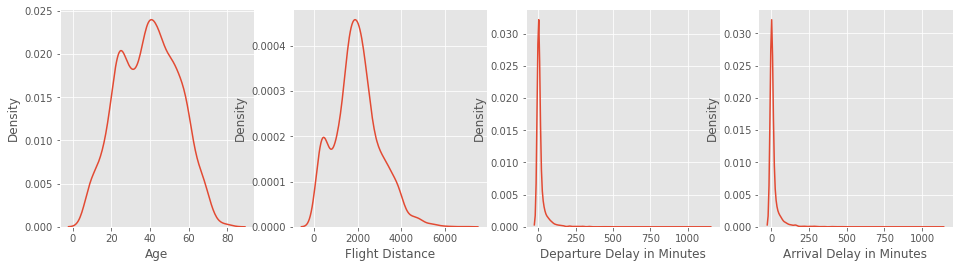

In [79]:
fig, ax = plt.subplots(1, 4, figsize = (16, 4))

for xint in range(4):
    sns.kdeplot(x = numeric_feature[xint], data = df_train, ax = ax[xint])

In [80]:
#log 변환 실행

df_train['Departure Delay in Minutes'] = np.log1p(df_train['Departure Delay in Minutes'])
df_train['Arrival Delay in Minutes'] = np.log1p(df_train['Arrival Delay in Minutes'])

#test 데이터에도 변환 실행

df_test['Departure Delay in Minutes'] = np.log1p(df_test['Departure Delay in Minutes'])
df_test['Arrival Delay in Minutes'] = np.log1p(df_test['Arrival Delay in Minutes'])

In [82]:
for xstr in numeric_feature:
    print(xstr, "Scew :", df_train[xstr].skew())
    # 모든 skew가 1 이하로 내려갔습니다

Age Scew : 0.0010456925943488839
Flight Distance Scew : 0.4509930169224059
Departure Delay in Minutes Scew : 0.9302111175258293
Arrival Delay in Minutes Scew : 0.8979015577156512


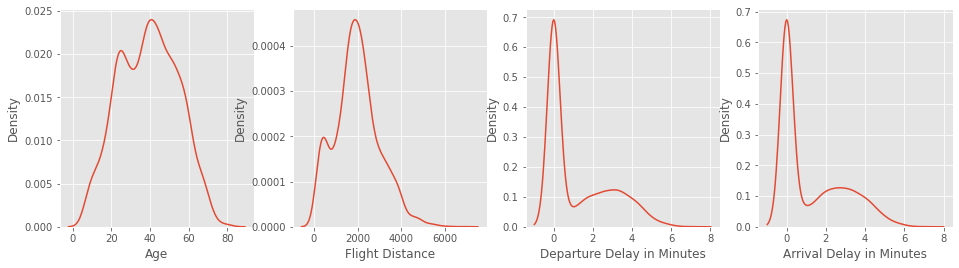

In [84]:
fig, ax = plt.subplots(1, 4, figsize = (16, 4))

for xint in range(4):
    sns.kdeplot(x = numeric_feature[xint], data = df_train, ax = ax[xint])


## target과 feature의 관계 (violin plot)

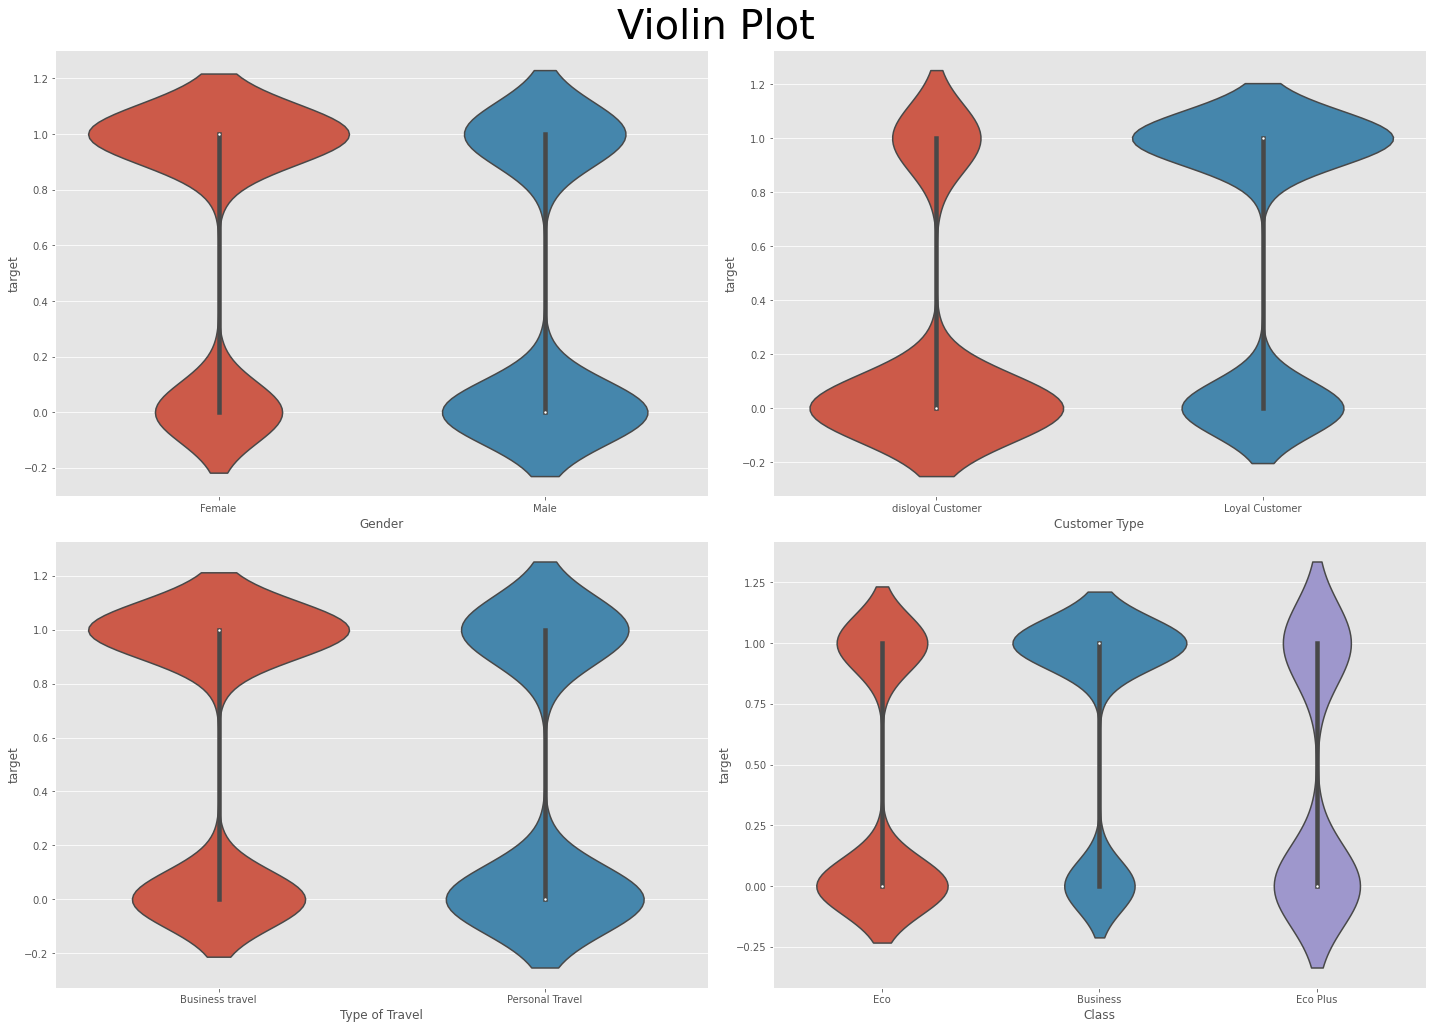

In [85]:
# 타겟 설정
target = "target"
# 범주형 데이터 분리
categorical_feature = df_train.columns[df_train.dtypes=='object']

plt.figure(figsize=(20,15))
plt.suptitle("Violin Plot", fontsize=40)

# id는 제외하고 시각화합니다.
for i in range(len(categorical_feature)):
    plt.subplot(2,2,i+1)
    plt.xlabel(categorical_feature[i])
    plt.ylabel(target)
    sns.violinplot(x= df_train[categorical_feature[i]], y= df_train[target])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- Customer Type 변수에서 disloyal인지 Loyal인지에 따라 만족도(target)이 상당히 차이가 나는 것을 확인할 수 있습니다.(그래서 해당변수는 예측에 있어 중요한 변수라고 볼 수 있습니다.)
- Gender에서도 Female와 Male인지에 따라 어느정도 만족도 차이가 있는것을 확인할 수 있습니다.

In [86]:
# 수치형 데이터 분리
numeric_feature = df_train.columns[(df_train.dtypes=='int64') | (df_train.dtypes=='float')]
num_data = df_train[numeric_feature]
num_data

Age  Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0      22             1599             3                                  0   
1      37             2810             2                                  4   
2      46             2622             1                                  1   
3      24             2348             3                                  3   
4      58              105             3                                  3   
...   ...              ...           ...                                ...   
2995   30             2377             1                                  5   
2996   24             1643             2                                  4   
2997   22             1442             2                                  2   
2998   33             2158             2                                  2   
2999   42              624             1                                  2   

      Food and drink  Gate location  Inflight wifi service  \
0                  3              3                      4   
1                  4              4                      1   
2                  1              1                      4   
3                  3              3                      3   
4                  3              3                      4   
...              ...            ...                    ...   
2995               1              1                      1   
2996               3              4                      5   
2997               2              3                      4   
2998               2              5                      4   
2999               2              2                      3   

      Inflight entertainment  Online support  Ease of Online booking  \
0                          3               4                       4   
1                          4               3                       5   
2                          5               5                       4   
3                          3               3                       3   
4                          4               5                       4   
...                      ...             ...                     ...   
2995                       4               4                       1   
2996                       3               5                       5   
2997                       2               4                       4   
2998                       2               4                       4   
2999                       3               4                       1   

      On-board service  Leg room service  Baggage handling  Checkin service  \
0                    5                 4                 4                4   
1                    5                 4                 2                1   
2                    4                 4                 4                5   
3                    2                 4                 5                3   
4                    4                 4                 4                4   
...                ...               ...               ...              ...   
2995                 3                 5                 3                4   
2996                 2                 2                 4                1   
2997                 3                 2                 3                4   
2998                 5                 2                 5                5   
2999                 1                 1                 1                3   

      Cleanliness  Online boarding  Departure Delay in Minutes  \
0               5                4                    0.000000   
1               5                2                    2.944439   
2               4                3                    0.000000   
3               4                3                    2.397895   
4               4                5                    0.000000   
...           ...              ...                         ...   
2995            2                4  

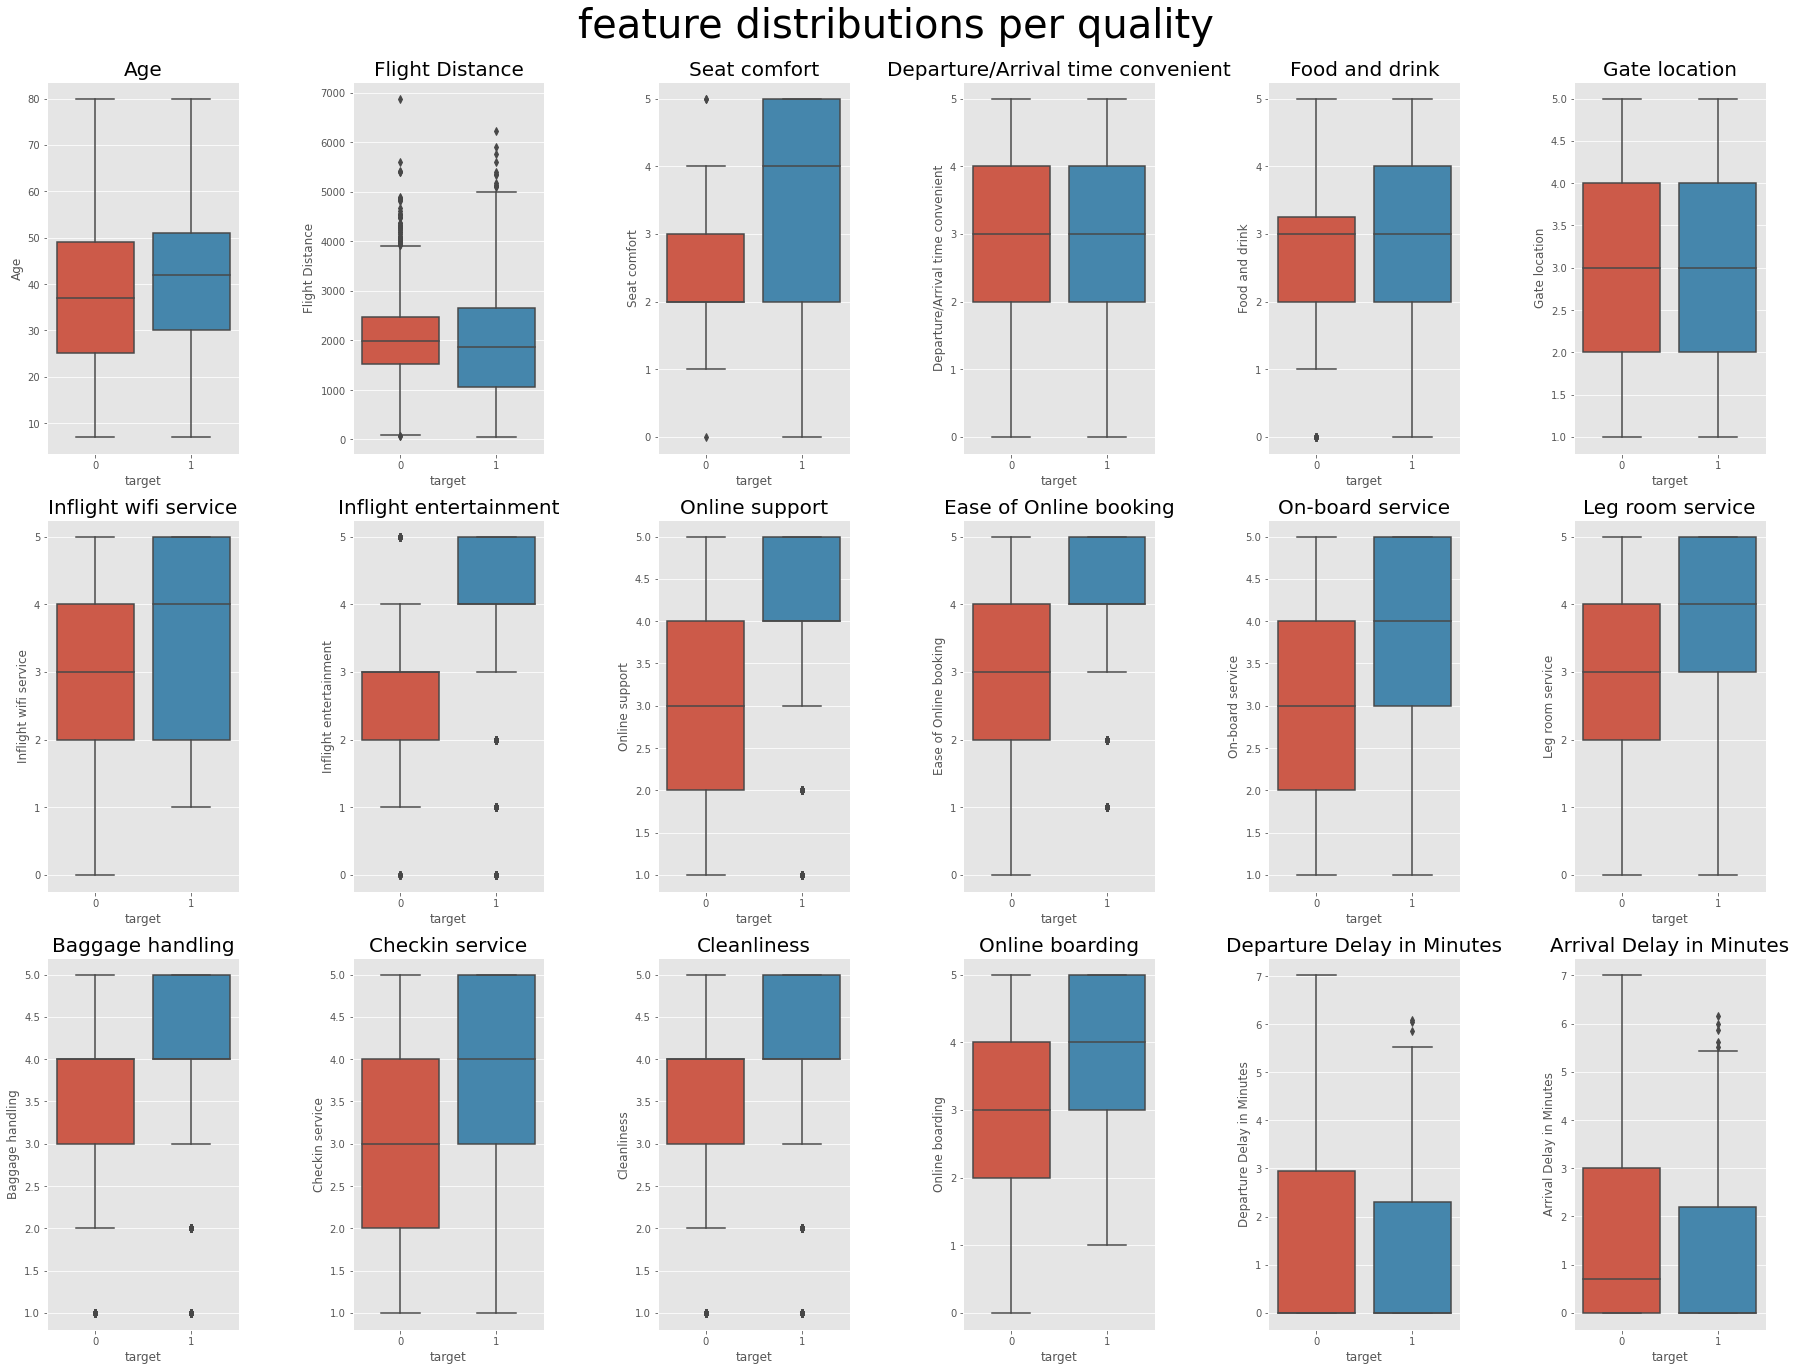

In [87]:
# 박스플롯
fig, axes = plt.subplots(3, 6, figsize=(25, 20))

fig.suptitle('feature distributions per quality', fontsize= 40)
for ax, col in zip(axes.flat, num_data.columns[:-1]):
    sns.boxplot(x= 'target', y= col, ax=ax, data=num_data)
    ax.set_title(col, fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- box plot을 보니 age, Departure/Arrive time convenient, gate location과 같은 변수는 target에 영향이 없는 듯합니다

## 상관관계 시각화

In [88]:
# 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환해줍니다.
from sklearn.preprocessing import LabelEncoder
corr_df = df_train.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

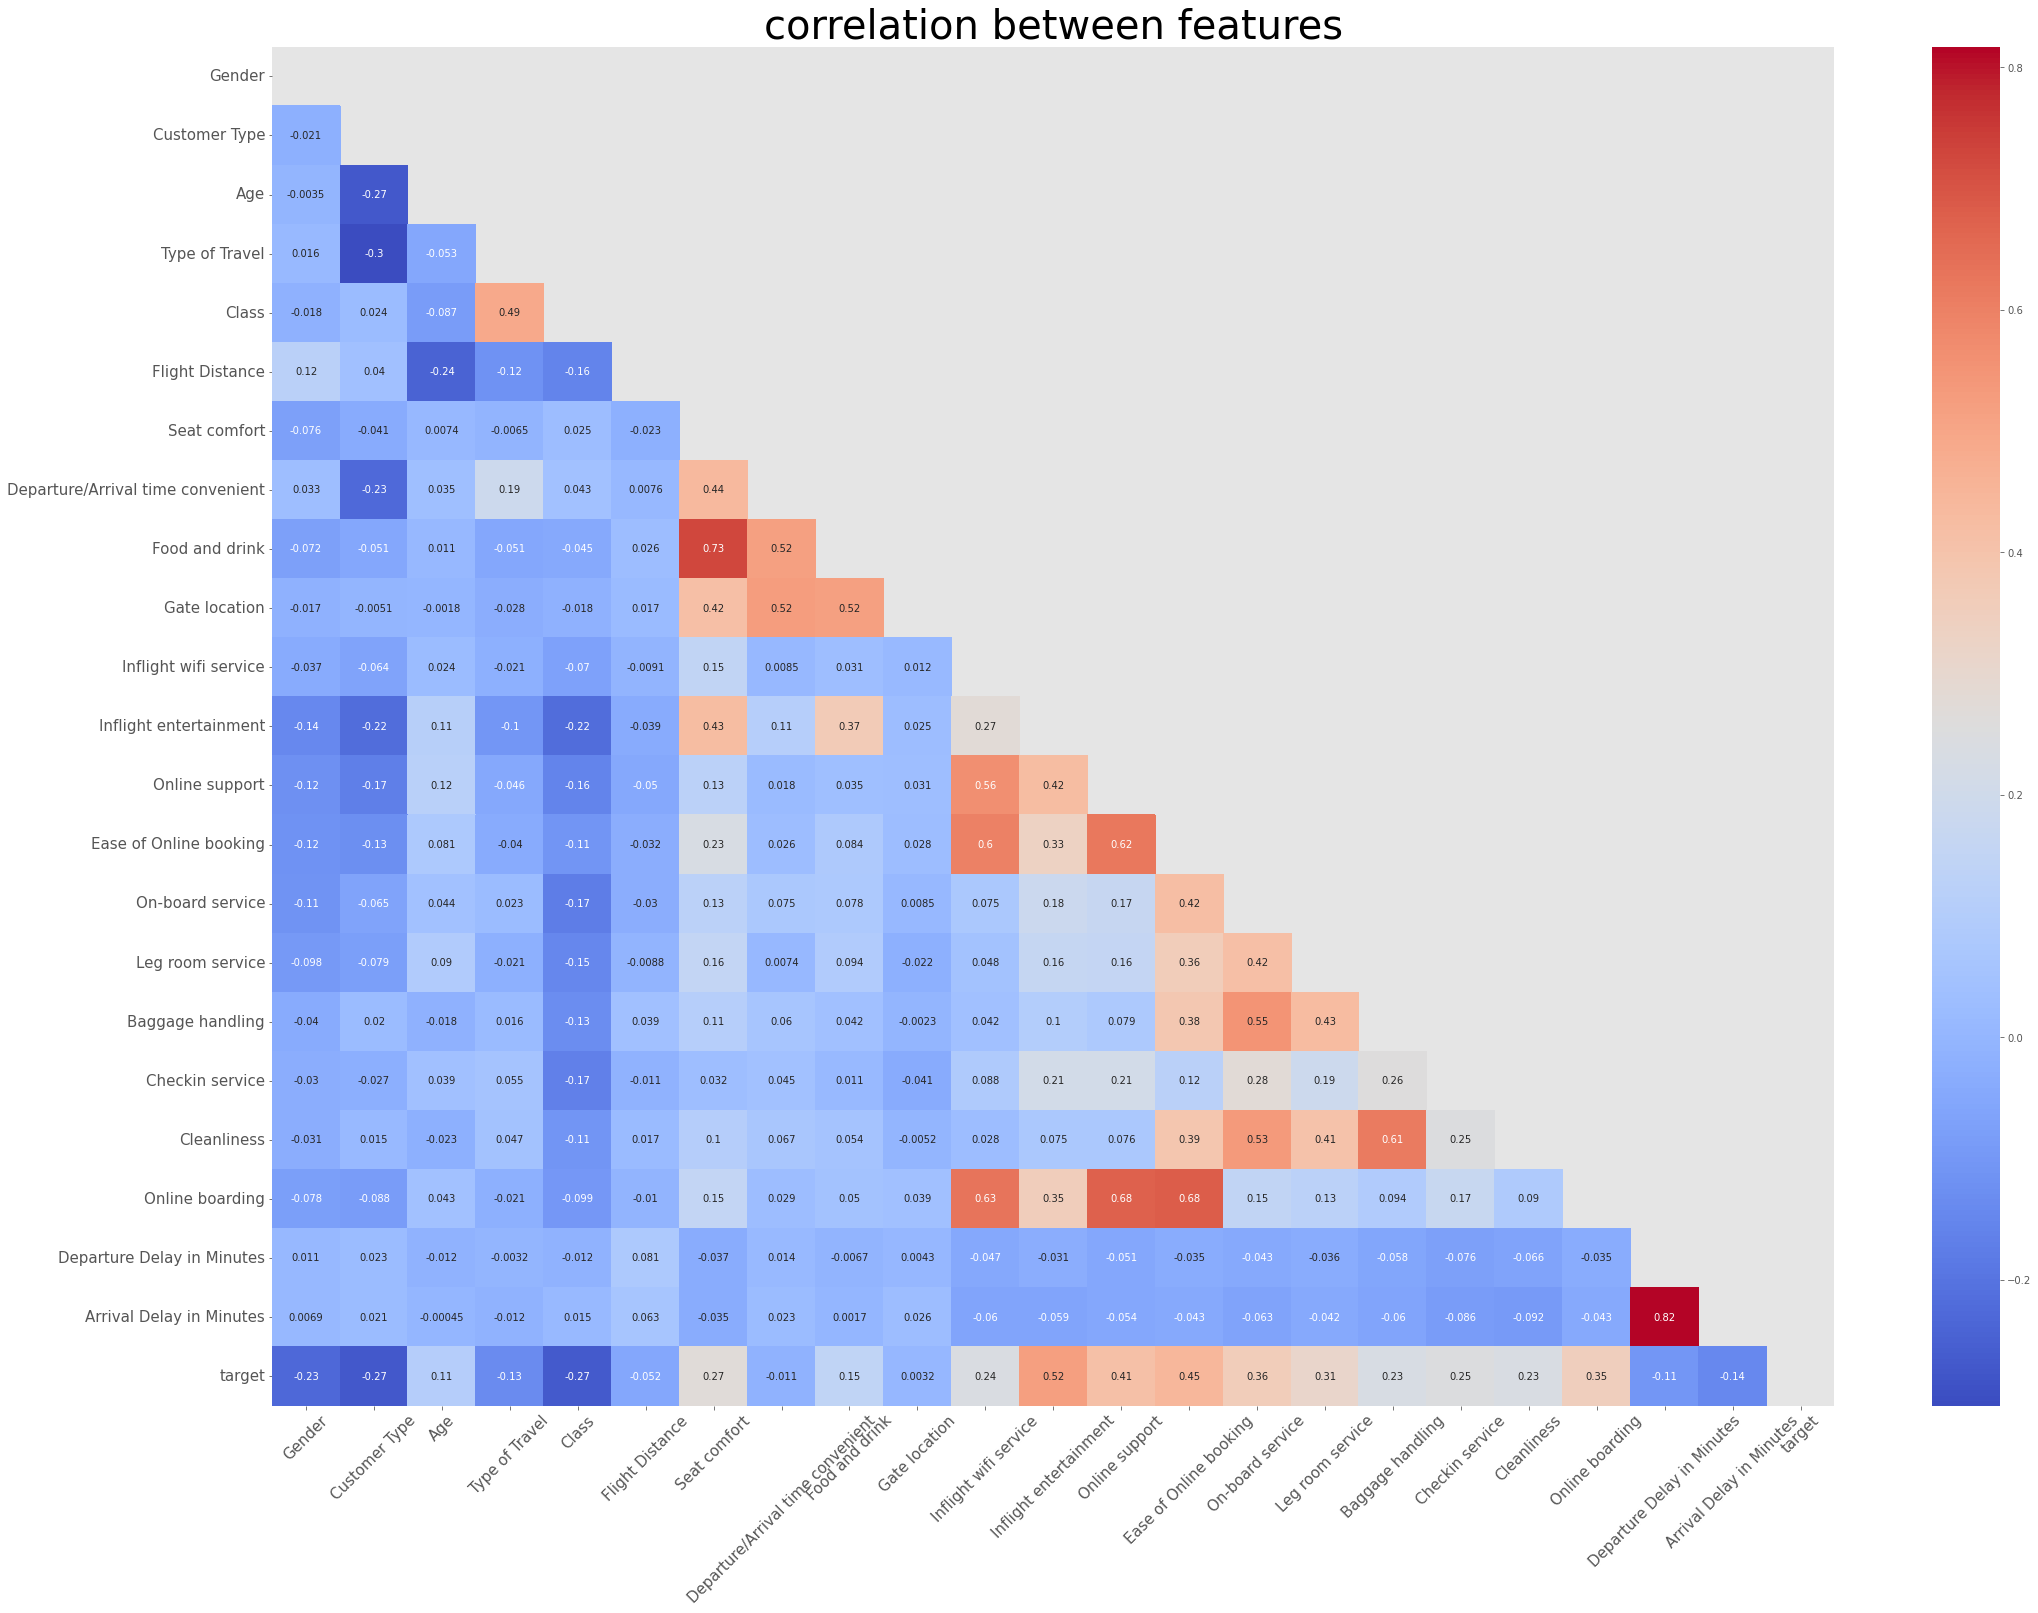

In [89]:
#상관관계 분석도
plt.figure(figsize=(35,25))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

- 고객 만족도인 target은 Inflight entertainment와 가장 높은 상관(0.52)을 보입니다
- 그외에도 Online Support, Ease of Online booking, On-board service와도 높은 상관을 보입니다.
- Departure/Arrive Delay in Minutes는 서로 과한 상관관계가 보입니다. 전체적으로 큰 영향은 없지만 작지 않다고 생각해 두 값을 합치는 방향으로 선택합니다

In [102]:
df_train['total_Delay'] = df_train[['Departure Delay in Minutes','Arrival Delay in Minutes']].sum(axis=1)
df_test['total_Delay'] = df_test[['Departure Delay in Minutes','Arrival Delay in Minutes']].sum(axis=1)
df_train

Gender      Customer Type  Age   Type of Travel     Class  \
0     Female  disloyal Customer   22  Business travel       Eco   
1     Female     Loyal Customer   37  Business travel  Business   
2       Male     Loyal Customer   46  Business travel  Business   
3     Female  disloyal Customer   24  Business travel       Eco   
4     Female     Loyal Customer   58  Business travel  Business   
...      ...                ...  ...              ...       ...   
2995    Male     Loyal Customer   30  Personal Travel       Eco   
2996  Female  disloyal Customer   24  Business travel       Eco   
2997  Female  disloyal Customer   22  Business travel       Eco   
2998  Female  disloyal Customer   33  Business travel  Business   
2999  Female     Loyal Customer   42  Business travel       Eco   

      Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0                1599             3                                  0   
1                2810             2                                  4   
2                2622             1                                  1   
3                2348             3                                  3   
4                 105             3                                  3   
...               ...           ...                                ...   
2995             2377             1                                  5   
2996             1643             2                                  4   
2997             1442             2                                  2   
2998             2158             2                                  2   
2999              624             1                                  2   

      Food and drink  Gate location  Inflight wifi service  \
0                  3              3                      4   
1                  4              4                      1   
2                  1              1                      4   
3                  3              3                      3   
4                  3              3                      4   
...              ...            ...                    ...   
2995               1              1                      1   
2996               3              4                      5   
2997               2              3                      4   
2998               2              5                      4   
2999               2              2                      3   

      Inflight entertainment  Online support  Ease of Online booking  \
0                          3               4                       4   
1                          4               3                       5   
2                          5               5                       4   
3                          3               3                       3   
4                          4               5                       4   
...                      ...             ...                     ...   
2995                       4               4                       1   
2996                       3               5                       5   
2997                       2               4                       4   
2998                       2               4                       4   
2999                       3               4                       1   

      On-board service  Leg room service  Baggage handling  Checkin service  \
0                    5                 4                 4                4   
1                    5                 4                 2                1   
2                    4                 4                 4                5   
3                    2                 4                 5                3   
4                    4                 4                 4                4   
...                ...               ...               ...              ...   
2995                 3                 5                 3                4   
2996                 2                 2                 4            

# feature / target 관계 파악

In [91]:
numeric_feature = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'total_Delay']
ordinal_feature = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 
           'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 
           'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']
categorical_feature = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

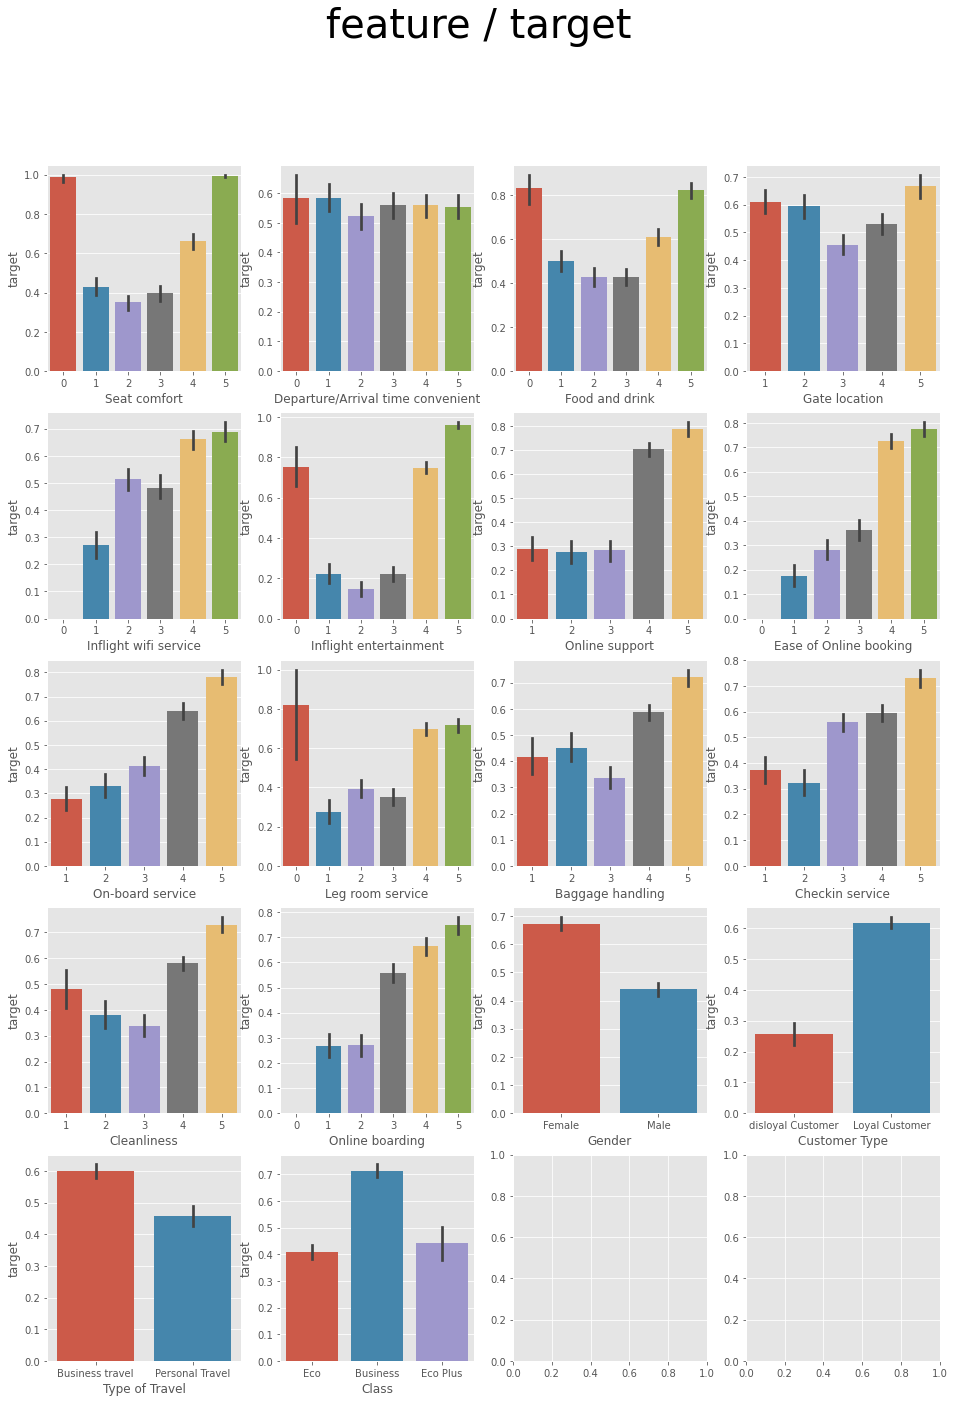

In [92]:
fig, ax = plt.subplots(5, 4, figsize = (16, 22))

plt.suptitle("feature / target", fontsize=40)

feature = ordinal_feature + categorical_feature

xvalue = 0
yvalue = 0

for xstr in feature:
    sns.barplot(x = xstr, y = 'target', data = df_train, ax = ax[yvalue][xvalue])
        
    if xvalue == 3:
        xvalue = 0
        yvalue += 1
    else:
        xvalue += 1

### ordinal feature의 0과 target의 관계를 주목해 본다
- 만족도의 범위를 0~5인지, 1~5인지에 따라 0의 의미가 달라지기 때문에 꼭 확인하고 넘어가야 하는 값이다.
- 0포함시 : 0도 만족도의 정도를 표현하는 것 이라고 판단
- 0 미포함시 : 0은 설문 참여하지 않았다고 판다
- 결론 : odinal feature에서 0과 5가 동시에 target이 1이 높은 값을 나타내는 것은 모순이라고 판단하여 0은 설문에 참여하지 않은 것이라고 생각한다.

# 결측치 확인

In [93]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(df_train)

결측치가 존재하지 않습니다


In [104]:
train_x = df_train.drop(["target", "Departure Delay in Minutes", "Arrival Delay in Minutes"],axis=1)
test_x = df_test.drop(["Departure Delay in Minutes", "Arrival Delay in Minutes"],axis=1)
train_y = df_train.target 

#라벨인코딩을 하기 위함 dictionary map 생성 함수
def make_label_map(dataframe):
    label_maps = {}
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            label_map = {'unknown':0}
            for i, key in enumerate(dataframe[col].unique()):
                label_map[key] = i+1  #새로 등장하는 유니크 값들에 대해 1부터 1씩 증가시켜 키값을 부여해줍니다.
            label_maps[col] = label_map
    return label_maps

# 각 범주형 변수에 인코딩 값을 부여하는 함수
def label_encoder(dataframe, label_map):
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            dataframe[col] = dataframe[col].map(label_map[col])
            dataframe[col] = dataframe[col].fillna(label_map[col]['unknown']) #혹시 모를 결측값은 unknown의 값(0)으로 채워줍니다.
    return dataframe

# train 데이터 라벨 인코딩
label_map = make_label_map(train_x) # train 사용해 label map 생성
train_x = label_encoder(train_x, label_map) # train 라벨 인코딩

train_x.head()


Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0       1              1   22               1      1             1599   
1       1              2   37               1      2             2810   
2       2              2   46               1      2             2622   
3       1              1   24               1      1             2348   
4       1              2   58               1      2              105   

   Seat comfort  Departure/Arrival time convenient  Food and drink  \
0             3                                  0               3   
1             2                                  4               4   
2             1                                  1               1   
3             3                                  3               3   
4             3                                  3               3   

   Gate location  Inflight wifi service  Inflight entertainment  \
0              3                      4                       3   
1              4                      1                       4   
2              1                      4                       5   
3              3                      3                       3   
4              3                      4                       4   

   Online support  Ease of Online booking  On-board service  Leg room service  \
0               4                       4                 5                 4   
1               3                       5                 5                 4   
2               5                       4                 4                 4   
3               3                       3                 2                 4   
4               5                       4                 4                 4   

   Baggage handling  Checkin service  Cleanliness  Online boarding  \
0                 4                4            5                4   
1                 2                1            5                2   
2                 4                5            4                3   
3                 5                3            4                3   
4                 4                4            4                5   

   total_Delay  
0     0.000000  
1     5.888878  
2     0.000000  
3     3.496508  
4     0.000000

In [109]:
print(df_test.info(), df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 2000 non-null   int64  
 1   Gender                             2000 non-null   object 
 2   Customer Type                      2000 non-null   object 
 3   Age                                2000 non-null   int64  
 4   Type of Travel                     2000 non-null   object 
 5   Class                              2000 non-null   object 
 6   Flight Distance                    2000 non-null   int64  
 7   Seat comfort                       2000 non-null   int64  
 8   Departure/Arrival time convenient  2000 non-null   int64  
 9   Food and drink                     2000 non-null   int64  
 10  Gate location                      2000 non-null   int64  
 11  Inflight wifi service              2000 non-null   int64

In [111]:
from sklearn.preprocessing import StandardScaler

num_features = ['Age','Flight Distance','total_Delay']

scaler = StandardScaler()
train_x[num_features] = scaler.fit_transform(train_x[num_features]) 
test_x[num_features] = scaler.fit_transform(test_x[num_features])
train_x.head()

Gender  Customer Type       Age  Type of Travel  Class  Flight Distance  \
0       1              1 -1.138798               1      1        -0.373641   
1       1              2 -0.145833               1      2         0.804446   
2       2              2  0.449945               1      2         0.621556   
3       1              1 -1.006402               1      1         0.355003   
4       1              2  1.244317               1      2        -1.827036   

   Seat comfort  Departure/Arrival time convenient  Food and drink  \
0             3                                  0               3   
1             2                                  4               4   
2             1                                  1               1   
3             3                                  3               3   
4             3                                  3               3   

   Gate location  Inflight wifi service  Inflight entertainment  \
0              3                      4                       3   
1              4                      1                       4   
2              1                      4                       5   
3              3                      3                       3   
4              3                      4                       4   

   Online support  Ease of Online booking  On-board service  Leg room service  \
0               4                       4                 5                 4   
1               3                       5                 5                 4   
2               5                       4                 4                 4   
3               3                       3                 2                 4   
4               5                       4                 4                 4   

   Baggage handling  Checkin service  Cleanliness  Online boarding  \
0                 4                4            5                4   
1                 2                1            5                2   
2                 4                5            4                3   
3                 5                3            4                3   
4                 4                4            4                5   

   total_Delay  
0    -0.806458  
1     1.085347  
2    -0.806458  
3     0.316797  
4    -0.806458

# 모델 설계
### Sigmoid Function
- 이번 베이스라인에서 사용할 모델은 Logistic Regression 입니다.

- Logistic Regression 의 기초가 되는 요소는 Sigmoid 함수 입니다.

- Sigmoid 함수는 입력 값을 받아 0 과 1 사이의 값을 출력하는 합수 입니다.

- sigmoid(z) = 1 / 1 + exp(-z)
- Logistic Regression 모델에서의 입력 값을 z 라고 하겠습니다.

- 이때 z 는 데이터의 feature(x) 들과 학습을 통해 정해진 weights(w) 들로 이루어져 있습니다.

- z = x1 * w1 + x2 * w2 + ... + xn * wn
- Logostic Regression 모델은 이러한 z 를 입력 값으로 받아, Sigmoid 함수에 입력해 0 과 1 사이의 값을 출력하는 모델입니다.

- 이때 threshold 0.5 기준으로 0 또는 1 의 값을 출력합니다.

- 이때 모델이 학습하는 것은 데이터의 feature 들에 따른 weights 들 입니다.

- 우선 학습 이전 최초의 weights 들은 랜덤한 값으로 정해집니다.

- 그 후 학습을 통해 Loss Function 의 결과가 최소가 되는 방향으로 weights 들이 수정됩니다.

### Loss Functinon
- 이때 Loss Function 은 실재 값과 모델이 예측한 값의 거리를 출력하는 함수 입니다.

- 쉽게 말해 Loss Function 은 모델의 예측이 얼마나 틀렸는지를 알려주는 함수 입니다.

- 이 때 "모델의 예측이 얼마나 틀렸는지" 를 어떻게 정의하느냐에 따라 어떤 Loss Function 을 사용할 지가 정해집니다.

- 이번 베이스라인에서는 CrossEntropy Loss Function 을 사용해 보도록 하겠습니다.

- Ly' = -log(y') if y=1 else -log(1-y')
### Gradient Desent
- 이제 Loss Function 을 최소화할 방법이 필요 합니다.

- 다시 말해 어떠한 방식을 활용해 Loss Function 의 결과가 최소화되는 입력값 weights 를 찾을지 생각해 보아야 합니다.

- 머신러닝에서 이러한 과정을 "학습" 이라고 합니다.

- Logistic Regression 모델은 gradient descent 라는 방식으로 학습을 합니다.

- 미분을 통해 특정 weights 가 Loss Function 에 입력 되었을 때, 함수 상 그 지점에서의 기울기를 알 수 있습니다.

- 기울기를 통해 어느 방향으로 weights 를 수정해야 Loss Function 상에서 더 낮은 지점으로 나아갈 수 있는지 알 수 있습니다.

### Learning Rate
- 이때 특정 방향으로 얼마나 움직일지 결정하는 요인이 Learning Rate 입니다.

- Learning Rate 이 작을 수록 weights 를 조금씩 수정해 Loss Function 상에서 조금 씩 이동하겠다는 의미입니다.

- epochs 는 학습 과정에서 총 몇번을 이동해야할지 결정하는 요인입니다.

In [112]:
import numpy as np

np.random.seed(1)

class LogisticRegression:
    
    # sigmoid 함수를 생성합니다
    def sigmoid(self, z): 
        return 1 / (1 + np.exp(-z))
    
    # lossfucntion 을 생성합니다
    def loss_function(self, X, y, weights): 
        total = len(X)
        z = np.dot(X, weights)
        prediction1 = y * np.log(self.sigmoid(z))
        prediction2 = (1 - y) * np.log(1 - self.sigmoid(z))
        return -sum(prediction1 + prediction2) / total
    
    #gradient decent 방법을 이용해 학습 함수를 생성합니다
    #learning rate 와 epochs 파라미터를 지정합니다
    def fit(self, X, y, epochs=500, lr=0.01):        
        loss = []
        weights = np.random.rand(X.shape[1])
        total = len(X)
                 
        for epoch in range(epochs):        
            y_hat = self.sigmoid(np.dot(X, weights))
            weights = weights - (lr * np.dot(X.T,  y_hat - y) / total)      
            loss.append(self.loss_function(X, y, weights)) 
            
        self.weights = weights
        self.loss = loss

    def predict(self, X):
        z = np.dot(X, self.weights)
        result = self.sigmoid(z)
        return result
    
    def to_bin(self,result):
        arr=[]
        for i in result:
            if i >0.5:
                arr.append(1)
            else : 
                arr.append(0)
        return arr

# 모델 학습

In [115]:
lr = LogisticRegression()
lr.fit(train_x,train_y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


In [98]:
from google.colab import files
uploaded_train = files.upload()

Saving sample_submission.csv to sample_submission.csv


In [116]:
pred = lr.predict(df_test)
pred_bin = lr.to_bin(pred)

ValueError: ignored

In [99]:
sample_submission = pd.read_csv('./sample_submission.csv')

sample_submission.target = pred_bin
sample_submission.to_csv("submission.csv",index=False)

NameError: ignored